In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Audio

In [94]:
filename = 'downloads/note.m4a'
y, sr = librosa.load(filename, sr=None,mono=True)
print('y:', y, '\n')
print('y shape:', y.shape, '\n')
print('Sample Rate (KHz):', sr, '\n')

Audio(y,rate=sr)

y: [0. 0. 0. ... 0. 0. 0.] 

y shape: (604032,) 

Sample Rate (KHz): 44100 



In [95]:
if y.shape[0] == 2:
    left = y[0]
    right = y[1]
    plt.figure(figsize = (16, 6))
    librosa.display.waveshow(y = left, sr = sr, color = '#FFB100', alpha=0.5)
    librosa.display.waveshow(y = right, sr = sr, color = '#BB33FF', alpha=0.5)
    plt.title("Left/Right = Purple", fontsize = 23);

In [96]:
DB = librosa.amplitude_to_db(y, ref = np.max)


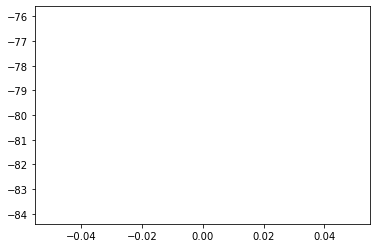

In [97]:
plt.plot(DB[0])

In [98]:
from sklearn.preprocessing import minmax_scale

db_scaled = minmax_scale(DB, axis=1)
db_scaled.shape[1]

IndexError: tuple index out of range

In [99]:
import cv2
from PIL import Image
from queue import Queue

def queue_ave(q):
    queue_list = []
    while not q.empty():
        queue_list.append(q.get())
    for value in queue_list:  #reversed for stack(queue_list)change to
        q.put(value)
    return sum(queue_list) / len(queue_list)

def queue_max(q):
    queue_list = []
    while not q.empty():
        queue_list.append(q.get())
    for value in queue_list:  #reversed for stack(queue_list)change to
        q.put(value)
    return max(queue_list)

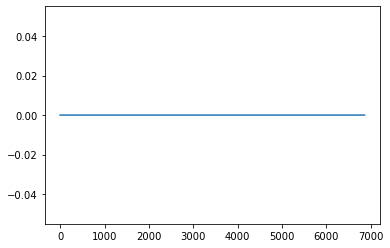

In [100]:
plt.plot(timeline)

In [101]:
i

5039895

In [104]:
#Feature extraction example
import numpy as np
import librosa

# Load the example clip
y, sr = librosa.load("downloads/note.m4a")

# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

print(tempo)
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                     sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])



60.09265988372093


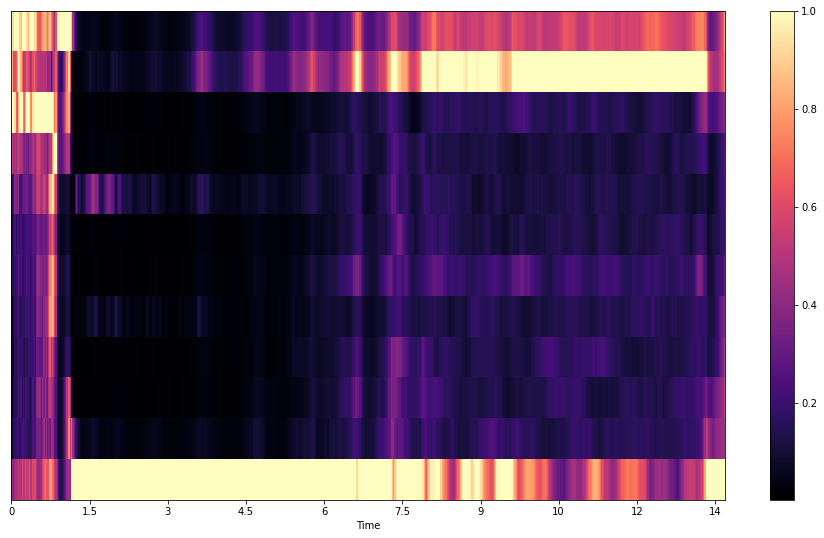

In [107]:
# print(beat_features.shape)

plt.figure(figsize=(16,9))
librosa.display.specshow(chromagram[:,:], x_axis="time")
plt.colorbar();
# Audio(chromagram[0],rate=sr)

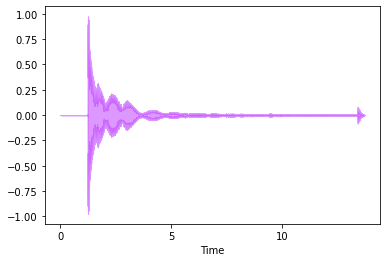

In [106]:
librosa.display.waveshow(y = y, sr = sr, color = '#BB33FF', alpha=0.5)

In [21]:
frames = []
fps = 60
frameSize = (256,8)
n_frames_avg = 5
running_avg_last_n_frames = Queue(maxsize=n_frames_avg)
timeline = []
for i in range(0, db_scaled.shape[0], int(sr/fps) ):
    if running_avg_last_n_frames.full():
        running_avg_last_n_frames.get()

    running_avg_last_n_frames.put((db_scaled[i]*255))
    
    to_insert = queue_ave(running_avg_last_n_frames)
    timeline.append(to_insert)
    
#     frame_np = np.full((frameSize[0],frameSize[1],3), [0,0, to_insert ],dtype=np.uint8) 
    
#     frame = Image.fromarray(frame_np, 'RGB')
 
#     frame.save(f'video/frame{i}.jpg')
    